In [1]:
# %load ../../firstcell.py
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pop_df=pd.read_csv('Population_filtered.csv',index_col=0)
gdp_df=pd.read_csv('GDP_filtered.csv',index_col=0)
trade_df = pd.read_csv("../trade_matrix_clean.csv",index_col=0) 

In [3]:
trade_countries=trade_df['exporter'].unique()
pop_countries=pop_df['country.value'].unique()
intersc=set(trade_countries).intersection(pop_countries)
len(intersc)

181

In [12]:
print('Number countries in af:', len(trade_countries))
print('Number countries in pop:',len(pop_countries))
print('Number of countries in intersection:',len(intersc))

Number countries in af: 244
Number countries in pop: 217
Number of countries in intersection: 181


In [13]:
d_trade_intersc=set(trade_countries)-intersc
d_pop_intersc=set(pop_countries)-intersc
print('leftover countries of population data:',len(d_pop_intersc))
print('leftover countries of af data:',len(d_trade_intersc))

leftover countries of population data: 36
leftover countries of af data: 63


In [20]:
leftover=pd.DataFrame(data=[d_trade_intersc,d_pop_intersc]).transpose()

In [37]:
leftover.rename({0:'trade - intersection',1:'population - intersection'},axis=1,inplace=True)
# leftover.to_csv('leftover_countries.csv',sep='\t')
leftover.head(60)

,trade - intersection,population - intersection
0,Palestine,St. Kitts and Nevis
1,Bahamas,"Macao SAR, China"
2,"China, mainland",St. Vincent and the Grenadines
3,Bouvet Island,Kosovo
4,United States Virgin Islands,"Congo, Dem. Rep."
5,Cook Islands,"Iran, Islamic Rep."
6,Slovakia,West Bank and Gaza
7,Lao People's Democratic Republic,"Gambia, The"
8,Johnston Island,St. Martin (French part)
9,Saint Pierre and Miquelon,Virgin Islands (U.S.)


In [6]:
concurrent_trade_df=trade_df[(trade_df['exporter'].isin(intersc))&(trade_df['importer'].isin(intersc))]
concurrent_gdp_df=gdp_df[gdp_df['country.value'].isin(intersc)]
concurrent_pop_df=pop_df[pop_df['country.value'].isin(intersc)]

### TODO: Assess the problem of country names.

For now, I'm going to only work with concurrent countries of both datasets (181)

## Normilizing with respect to population

In [7]:
concurrent_pop_df

,countryiso3code,date,value,indicator.value,country.value
0,AFG,2017,36296400.0,"Population, total",Afghanistan
1,AFG,2016,35383128.0,"Population, total",Afghanistan
2,AFG,2015,34413603.0,"Population, total",Afghanistan
3,AFG,2014,33370794.0,"Population, total",Afghanistan
4,AFG,2013,32269589.0,"Population, total",Afghanistan
...,...,...,...,...,...
6939,ZWE,1990,10432421.0,"Population, total",Zimbabwe
6940,ZWE,1989,10153852.0,"Population, total",Zimbabwe
6941,ZWE,1988,9849125.0,"Population, total",Zimbabwe
6942,ZWE,1987,9527203.0,"Population, total",Zimbabwe


In [8]:
def norm_pop(x,case):
    """Assumes x is a column pandas series (column of dataframe)"""
    
    if case.lower()=='global':
        # multiply x by factors between 0 and 1 that account for the global population each year
        global_pop=concurrent_pop_df.groupby('date')['value'].sum()
        norm_factor=global_pop.min()
        return x*norm_factor/global_pop
    
    elif case=='foo':
        return x*normalizing_pop

def norm_gdp(x,case):
    if case.lower()=='global':
        # multiply x by factors between 0 and 1 that account for the global gdp each year
        global_gdp=concurrent_gdp_df.groupby('date')['value'].sum()
        norm_factor=global_gdp.min()
        return x*norm_factor/global_gdp
    
    elif case=='foo':
        normalizing_gdp=concurrent_gdp_df['value'].min()
        return x*normalizing_gdp
    
    
def nrml(a):    # Normalize in [0,1]
    return (a - a.min()) / (a.max() - a.min())


In [9]:
# aliasing
df=concurrent_trade_df

In [10]:
# create a dictionary with global amount of trade
    # quantity = Total imports 
    # mean_val = Average price 

items = df.groupby('Item').groups.keys()
glob_dict = {}            
py = df.groupby('Year')  # py = Per Year 
for year, group in py:
    glob_dict[year] = {}
    for itm in items:
        glob_dict[year][itm] = {}
        glob_dict[year][itm]['quantity'] = group.loc[group['Item']==itm].loc[group['Element']=='Import Quantity']['Value'].sum()
        glob_dict[year][itm]['mean_val'] = group.loc[group['Item']==itm].loc[group['Element']=='Import Value']['Value'].mean()  

norm_dict = {}    # create a new dictionary for normalizing values
for itm in items:
    norm_dict[itm] = {}
    for year in range(1986, 2018):
        norm_dict[itm][year] = {}
        norm_dict[itm][year]['qt'] = glob_dict[year][itm]['quantity']
        norm_dict[itm][year]['vl'] = glob_dict[year][itm]['mean_val']


for itm in items:  # add normalized values to global yearly dictionary 
    dfa = pd.DataFrame(norm_dict[itm]).transpose()
    dfa['n_gdp_qt'] = norm_gdp(dfa['qt'],case='global')
    dfa['n_gdp_vl'] = norm_gdp(dfa['vl'],case='global')
    dfa['n_pop_qt'] = norm_pop(dfa['qt'],case='global')
    dfa['n_pop_vl'] = norm_pop(dfa['vl'],case='global')
    for year in range(1986, 2018):
        glob_dict[year][itm]['gdp_qnt'] = dfa.loc[year]['n_gdp_qt']
        glob_dict[year][itm]['gdp_val'] = dfa.loc[year]['n_gdp_vl']
        glob_dict[year][itm]['pop_qnt'] = dfa.loc[year]['n_pop_qt']
        glob_dict[year][itm]['pop_val'] = dfa.loc[year]['n_pop_vl']

In [11]:
for year in range(1987, 2018):  # Calculate differences of trade values on consecutive years 
    for itm in items:
        glob_dict[year][itm]['gdp_delta_pr'] = np.abs(glob_dict[year][itm]['gdp_val'] - glob_dict[year-1][itm]['gdp_val'])
        glob_dict[year][itm]['gdp_delta_qt'] = np.abs(glob_dict[year][itm]['gdp_qnt'] - glob_dict[year-1][itm]['gdp_qnt'])
        glob_dict[year][itm]['pop_delta_pr'] = np.abs(glob_dict[year][itm]['pop_val'] - glob_dict[year-1][itm]['pop_val'])
        glob_dict[year][itm]['pop_delta_qt'] = np.abs(glob_dict[year][itm]['pop_qnt'] - glob_dict[year-1][itm]['pop_qnt'])
        
norm_dict2 = {}    # create a dictionary for normalizing delta values
for itm in items:
    norm_dict2[itm] = {}
    for year in range(1987, 2018):
        norm_dict2[itm][year] = {}
        norm_dict2[itm][year]['gdp_delta_pr'] = glob_dict[year][itm]['gdp_delta_pr']
        norm_dict2[itm][year]['gdp_delta_qt'] = glob_dict[year][itm]['gdp_delta_qt']
        norm_dict2[itm][year]['pop_delta_pr'] = glob_dict[year][itm]['pop_delta_pr']
        norm_dict2[itm][year]['pop_delta_qt'] = glob_dict[year][itm]['pop_delta_qt']


for itm in items:  # add normalized delta values to global yearly dictionary 
    dfa = pd.DataFrame(norm_dict2[itm]).transpose()
    dfa['gdp_delta_pr_n'] = nrml(dfa['gdp_delta_pr'])
    dfa['gdp_delta_qt_n'] = nrml(dfa['gdp_delta_qt'])
    dfa['pop_delta_pr_n'] = nrml(dfa['pop_delta_pr'])
    dfa['pop_delta_qt_n'] = nrml(dfa['pop_delta_qt'])
    
    for year in range(1987, 2018):
        glob_dict[year][itm]['gdp_pertb_pr'] = dfa.loc[year]['gdp_delta_pr_n']
        glob_dict[year][itm]['gdp_pertb_qt'] = dfa.loc[year]['gdp_delta_qt_n']
        glob_dict[year][itm]['pop_pertb_pr'] = dfa.loc[year]['pop_delta_pr_n']
        glob_dict[year][itm]['pop_pertb_qt'] = dfa.loc[year]['pop_delta_qt_n']
        
    

In [12]:
for year in range(1987, 2018):  # take yearly mean of perturbation over Item list ...
    glob_dict[year]['gdp_PERTB_pr'] = pd.DataFrame(glob_dict[year]).transpose()['gdp_pertb_pr'].mean()
    glob_dict[year]['gdp_PERTB_qt'] = pd.DataFrame(glob_dict[year]).transpose()['gdp_pertb_qt'].mean()
    glob_dict[year]['pop_PERTB_pr'] = pd.DataFrame(glob_dict[year]).transpose()['pop_pertb_pr'].mean()
    glob_dict[year]['pop_PERTB_qt'] = pd.DataFrame(glob_dict[year]).transpose()['pop_pertb_qt'].mean()


DF = pd.DataFrame(glob_dict).transpose()
DF['gdp_perturb_pr'] = nrml(DF['gdp_PERTB_pr'])  # ... and Normalize them 
DF['gdp_perturb_qt'] = nrml(DF['gdp_PERTB_qt'])
DF['pop_perturb_pr'] = nrml(DF['pop_PERTB_pr'])  # ... and Normalize them 
DF['pop_perturb_qt'] = nrml(DF['pop_PERTB_qt'])

for year in range(1987, 2018):             # Add normalized perturbations values to global dictionary 
    glob_dict[year]['gdp_pertN_pr'] = DF.loc[year]['gdp_perturb_pr']
    glob_dict[year]['gdp_pertN_qt'] = DF.loc[year]['gdp_perturb_qt']
    glob_dict[year]['pop_pertN_pr'] = DF.loc[year]['pop_perturb_pr']
    glob_dict[year]['pop_pertN_qt'] = DF.loc[year]['pop_perturb_qt']

In [13]:
dict_perts = {}    #   Create dictionary and DataFrame for perturbations 
for year in range(1987, 2018):
    dict_perts[year] = {}
    for x in ['gdp_pertN_pr','gdp_pertN_qt','pop_pertN_pr','pop_pertN_qt']:
        dict_perts[year][x] = glob_dict[year][x]
    for itm in items:
        for y in ['gdp_pertb_pr', 'gdp_pertb_qt','pop_pertb_pr','pop_pertb_qt']:
            dict_perts[year][itm+y[-3:]] = glob_dict[year][itm][y]
        

dfperts = pd.DataFrame(dict_perts).transpose()    
dfperts

,gdp_pertN_pr,gdp_pertN_qt,pop_pertN_pr,pop_pertN_qt,Barley_pr,Barley_qt,"Beans, dry_pr","Beans, dry_qt",Chick peas_pr,Chick peas_qt,...,Oats_pr,Oats_qt,Rice - total (Rice milled equivalent)_pr,Rice - total (Rice milled equivalent)_qt,Sorghum_pr,Sorghum_qt,Soybeans_pr,Soybeans_qt,Wheat_pr,Wheat_qt
1987,1.000000,1.000000,0.821440,0.825087,0.336277,0.000000,1.000000,0.834708,1.000000,0.359458,...,0.018779,0.058841,0.149206,0.299063,1.000000,1.000000,0.460945,0.271188,0.271056,0.000290
1988,0.534326,0.418929,0.555909,0.185411,0.020557,0.367632,0.310623,0.071146,0.922830,0.043981,...,0.208981,0.141716,0.616490,0.166171,0.397721,0.031550,0.878820,0.209206,0.005518,0.158752
1989,0.321032,0.147954,0.353917,0.022908,0.222635,0.056261,0.151898,0.261889,0.082431,0.188610,...,0.326056,0.146235,0.085463,0.010936,0.662445,0.267419,0.302157,0.101078,0.658807,0.118432
1990,0.355998,0.221701,0.265478,0.242575,0.219072,0.317674,0.650516,0.336482,0.214727,0.138534,...,0.100270,0.738991,0.383435,0.056136,0.136661,0.150300,0.161649,0.416335,0.013654,0.046578
1991,0.403279,0.313140,0.428480,0.415319,0.262958,0.194852,0.609985,0.012686,0.235412,0.055239,...,0.551394,0.642487,0.000000,0.045665,0.200336,0.484477,0.157091,0.107852,0.286427,0.334410
1992,0.356779,0.238101,0.404051,0.335264,0.227455,0.061989,0.386577,0.207169,0.116280,0.039532,...,0.360655,0.392899,0.083053,0.147983,0.133431,0.153417,0.198329,0.012498,0.144567,0.301111
1993,0.338874,0.136918,0.408118,0.130273,0.117501,0.228231,0.437000,0.196698,0.034239,0.125127,...,0.622085,0.131984,0.217502,0.068575,0.227223,0.174891,0.213169,0.182161,0.000000,0.000000
1994,0.354299,0.354462,0.500329,0.470996,0.294616,0.003323,0.460657,0.289454,0.328883,0.325320,...,0.050296,0.010295,0.363230,0.193956,0.143638,0.084305,0.398143,0.431732,0.734019,0.044419
1995,0.345006,0.240115,0.208030,0.241216,0.184421,0.193982,0.026280,0.033125,0.079117,0.047924,...,0.035780,0.666979,0.124612,0.135734,0.358492,0.390661,0.517278,0.233569,0.206162,0.031912
1996,0.361916,0.366106,0.579601,0.570013,0.381219,0.032249,0.155646,0.161374,0.393374,0.380129,...,0.971375,0.987858,0.450953,0.201480,0.635365,0.460271,0.120162,0.212553,0.763474,0.295937


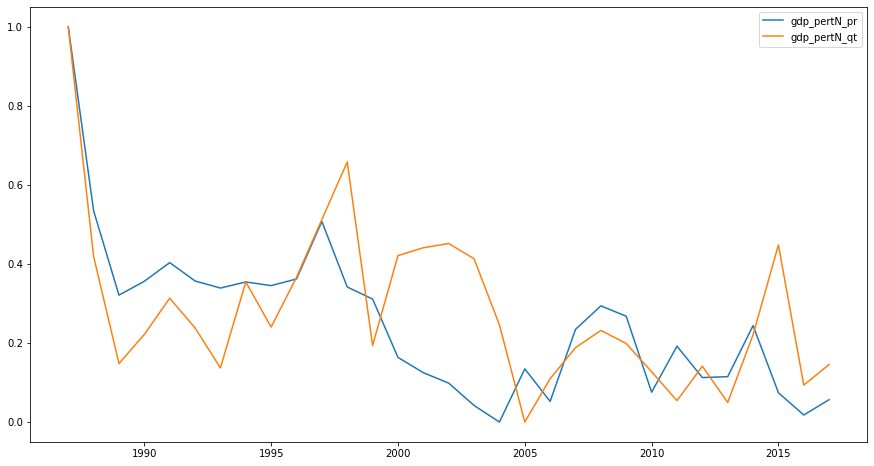

In [14]:
dfperts.plot(y=[x for x in dfperts.columns if x[:3]=='gdp'], figsize=(15, 8))

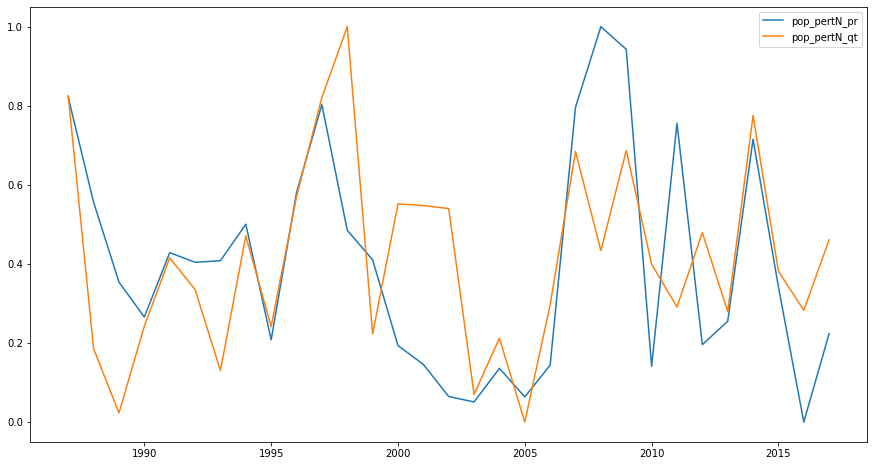

In [15]:
dfperts.plot(y=[x for x in dfperts.columns if x[:3]=='pop'], figsize=(15, 8))

In [16]:
# CONSTRUCTION OF NETWORK 


%matplotlib inline
import networkx as nx
lg = []    #  lg = list of graphs:  a network (graph) for each year
for year in range(1986, 2018):
    G = nx.MultiDiGraph(weighted=True)
    for index, row in df.loc[df['Year']==year].iterrows():
        if row['Element']=='Import Quantity':
            G.add_edge( row['exporter'], row['importer'], row['Item'], weight=row['Value'],   )
        else:
            G[row['exporter']][row['importer']][row['Item']]['value'] = row['Value']
    lg += [G]


In [17]:
#  create a dictionary with amount of trade per country
    # quantity = Total imports 
    # mean_val = Average price     
    
items = df.groupby('Item').groups.keys()
dict_country = {}            
pc = df.groupby('Year')  # pc = Per Country 

for name, group in df.groupby('importer'):
    dict_country[name] = {}
    
for name, group in df.groupby('exporter'):
    if name not in dict_country.keys():
        dict_country[name] = {}

year = int(1986)
for G in lg:
    for x in G.nodes():
        dict_country[x][year] = {}
        for y in G.out_edges(x):        
            for key, val in G[y[0]][y[1]].items():
                for k, v in val.items():
                    dict_country[x][year]['exp_'+key+'_'+k] = v
        for y in G.in_edges(x):
            for key, val in G[y[0]][y[1]].items():
                for k, v in val.items():
                    dict_country[x][year]['imp_'+key+'_'+k] = v
    year += 1
            
        

In [ ]:
for key, val in dict_country.items():
    xxx = pd.DataFrame(val).transpose()
    for col in xxx.columns:
        xxx[col] = nrml(xxx[col])
        xxx['dlt_'+col] = xxx[col] - xxx[col].shift(1)
        xxx['dlt_'+col] = nrml_(xxx['dlt_'+col])
    for year in range(1987, 2018):
        try:
            dict_country[key][year]['dlt_in_pr'] = xxx.drop([xc for xc in xxx.columns if 'dlt_imp_' != xc[:8] or '_value' not in xc ], axis=1).transpose()[year].mean()
            dict_country[key][year]['dlt_in_vl'] = xxx.drop([xc for xc in xxx.columns if 'dlt_imp_' != xc[:8] or '_weight' not in xc ], axis=1).transpose()[year].mean()
            dict_country[key][year]['dlt_ex_pr'] = xxx.drop([xc for xc in xxx.columns if 'dlt_exp_' != xc[:8] or '_value' not in xc ], axis=1).transpose()[year].mean()
            dict_country[key][year]['dlt_ex_vl'] = xxx.drop([xc for xc in xxx.columns if 'dlt_exp_' != xc[:8] or '_weight' not in xc ], axis=1).transpose()[year].mean()
        except: 
            print (key, year)

In [ ]:
dictotal = {} 
i = 0
j = 0
lp = []
for country in dict_country.keys():
    dictotal[country] = {}
    for year in dict_perts.keys():
        dictotal[country][year] = {}
        try:
            dictotal[country][year]['af_in_pr'] = -1*dict_country[country][year]['dlt_in_pr'] * dict_perts[year]['pertN_pr']
            dictotal[country][year]['af_in_vl'] = -1*dict_country[country][year]['dlt_in_vl'] * dict_perts[year]['pertN_qt']
            dictotal[country][year]['af_ex_pr'] = dict_country[country][year]['dlt_ex_pr'] * dict_perts[year]['pertN_pr']
            dictotal[country][year]['af_ex_vl'] = dict_country[country][year]['dlt_ex_vl'] * dict_perts[year]['pertN_qt']
            dictotal[country][year]['af_in_pr2'] = -1*dict_country[country][year]['dlt_in_pr'] * (dict_perts[year]['pertN_pr'] + dict_perts[year]['pertN_qt'])/2
            dictotal[country][year]['af_in_vl2'] = -1*dict_country[country][year]['dlt_in_vl'] * (dict_perts[year]['pertN_pr'] + dict_perts[year]['pertN_qt'])/2
            dictotal[country][year]['af_ex_pr2'] = dict_country[country][year]['dlt_ex_pr'] * (dict_perts[year]['pertN_pr'] + dict_perts[year]['pertN_qt'])/2
            dictotal[country][year]['af_ex_vl2'] = dict_country[country][year]['dlt_ex_vl'] * (dict_perts[year]['pertN_pr'] + dict_perts[year]['pertN_qt'])/2
        except:
            j += 1
            lp += [country]
        i += 1
print('total loops = ',i, 'total exceptions = ',j)